<a href="https://colab.research.google.com/github/ankur0003/Task_Road_Polygon/blob/master/Road_Polygon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow.compat.v2 as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
filepath_train = 'gdrive/My Drive/dataset/full_CNN_train.p'
filepath_labels = 'gdrive/My Drive/dataset/full_CNN_labels.p'
filepath_video_input= 'gdrive/My Drive/street_video.mp4'
filepath_image_input= 'gdrive/My Drive/im.jpg'

In [34]:
import pickle

In [35]:
train_dataset = pickle.load(open(filepath_train,'rb'))

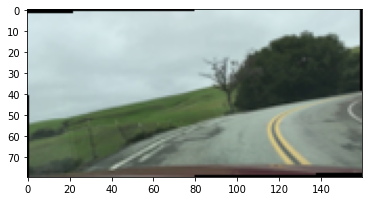

In [84]:
im = train_dataset[11000]
plt.imshow(im)


In [75]:
train_labels = pickle.load(open(filepath_labels,'rb'))

In [8]:
train_dataset = np.array(train_dataset)
train_labels = np.array(train_labels)
train_labels = train_labels/255

In [9]:
#shuffle images with their corresponding labels
train_dataset, train_labels = shuffle(train_dataset, train_labels)

# splitting data into trainiing and testing with their corresponding labels
X_train,X_val, Y_train,y_val  = train_test_split(train_dataset, train_labels, test_size=0.1)

# batch size , epochs and pool size
batch_size= 128
epochs=10
pool_size=(2,2)
input_shape = X_train.shape[1:]

In [10]:
#Let's create a model function
def CNN_model(inputshape, poolsize):
  model = Sequential()

  #normaliziing incoming inputs First layer needs the input shape to work
  model.add(BatchNormalization(input_shape = inputshape))
  #Conv layer 1
  model.add(Conv2D(8,(3,3),padding='valid',strides=(1,1), activation='relu',))

  #Conv layer 2
  model.add(Conv2D(16,(3,3), padding='valid', strides=(1,1), activation='relu'))

  #pooling
  model.add(MaxPooling2D(pool_size= poolsize))

  #Conv layer 3
  model.add(Conv2D(16,(3,3),padding='valid',strides=(1,1), activation='relu'))
  #Adding dropouts for some weights to go blank
  model.add(Dropout(0.2))

  #Conv layer 4
  model.add(Conv2D(32,(3,3),padding='valid',strides=(1,1), activation='relu'))
  #Adding dropouts for some weights to go blank
  model.add(Dropout(0.2))

  #Conv layer 5
  model.add(Conv2D(32,(3,3),padding='valid',strides=(1,1), activation='relu'))
  #Adding dropouts for some weights to go blank
  model.add(Dropout(0.2))

  #pooling
  model.add(MaxPooling2D(pool_size=poolsize))

  #Conv layer 6
  model.add(Conv2D(64,(3,3),padding='valid',strides=(1,1), activation='relu'))
  #Adding dropouts for some weights to go blank
  model.add(Dropout(0.2))

  #Conv layer 3
  model.add(Conv2D(64,(3,3),padding='valid',strides=(1,1), activation='relu'))
  #Adding dropouts for some weights to go blank
  model.add(Dropout(0.2))

  #pooling
  model.add(MaxPooling2D(pool_size=poolsize))

  #let's do an upsampling
  model.add(UpSampling2D(size=poolsize))

  #Deconvolutionating 1
  model.add(Conv2DTranspose(64,(3,3),padding='valid',strides=(1,1), activation='relu'))
  model.add(Dropout(0.2))

  #Deconvolutionating 2
  model.add(Conv2DTranspose(64,(3,3),padding='valid',strides=(1,1), activation='relu'))
  model.add(Dropout(0.2))

  #Upsampling 
  model.add(UpSampling2D(size=poolsize))

  #Deconvolutionating 3
  model.add(Conv2DTranspose(32,(3,3),padding='valid',strides=(1,1), activation='relu'))
  model.add(Dropout(0.2))

  #Deconvolutionating 4
  model.add(Conv2DTranspose(32,(3,3),padding='valid',strides=(1,1), activation='relu'))
  model.add(Dropout(0.2))

  #Deconvolutionating 5
  model.add(Conv2DTranspose(16,(3,3),padding='valid',strides=(1,1), activation='relu'))
  model.add(Dropout(0.2))

  #UpSampling
  model.add(UpSampling2D(size=poolsize))

  #Deconvolutionating 6
  model.add(Conv2DTranspose(16,(3,3),padding='valid',strides=(1,1), activation='relu'))
  
  #Deconvolutionating 1
  model.add(Conv2DTranspose(1,(3,3),padding='valid',strides=(1,1), activation='relu'))
  
  return model

In [12]:
# Create the neural network
model = CNN_model(input_shape, pool_size)

# Using a generator to help the model use less data
# Channel shifts help with shadows slightly
datagen = ImageDataGenerator(channel_shift_range=0.2)
datagen.fit(X_train)

# Compiling and training the model
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size), steps_per_epoch=len(X_train)/batch_size,
epochs=epochs, verbose=1, validation_data=(X_val, y_val))

# Freeze layers since training is done
model.trainable = False
model.compile(optimizer='Adam', loss='mean_squared_error')

# Save model architecture and weights
model.save('full_CNN_model.h5')

# Show summary of model
model.summary()

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
90/89 [==============================] - 732s 8s/step - loss: 0.0742 - val_loss: 0.0392
Epoch 2/10
90/89 [==============================] - 731s 8s/step - loss: 0.0226 - val_loss: 0.0182
Epoch 3/10
90/89 [==============================] - 731s 8s/step - loss: 0.0151 - val_loss: 0.0122
Epoch 4/10
90/89 [==============================] - 735s 8s/step - loss: 0.0124 - val_loss: 0.0104
Epoch 5/10
90/89 [==============================] - 734s 8s/step - loss: 0.0110 - val_loss: 0.0098
Epoch 6/10
90/89 [==============================] - 734s 8s/step - loss: 0.0101 - val_loss: 0.0086
Epoch 7/10
90/89 [==============================] - 735s 8s/step - loss: 0.0094 - val_loss: 0.0086
Epoch 8/10
90/89 [==============================] - 733s 8s/step - loss: 0.0092 - val_loss: 0.0082
Epoch 9/10
90/89 [==============================] - 733s 8s/step - loss: 0.0087 - val_loss: 0.0075
Epoch 10/10
90/89 [==============

In [27]:
!pip install scipy=='1.2.1'

     |████████████████████████████████| 24.8MB 163kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.2.1 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.2.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [1]:
import cv2
from scipy.misc import imresize
from skimage.transform import rescale, resize, downscale_local_mean
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from keras.models import load_model

In [85]:
# Class to average lanes with
class Lanes():
    def __init__(self):
        self.recent_fit = []
        self.avg_fit = []


def road_lines(image):
    """ Takes in a road image, re-sizes for the model,
    predicts the lane to be drawn from the model in G color,
    recreates an RGB image of a lane and merges with the
    original road image.
    """

    # Get image ready for feeding into model
    small_img = imresize(image, (80, 160, 3))
    small_img = np.array(small_img)
    small_img = small_img[None,:,:,:]

    # Make prediction with neural network (un-normalize value by multiplying by 255)
    prediction = model.predict(small_img)[0] * 255

    # Add lane prediction to list for averaging
    lanes.recent_fit.append(prediction)
    # Only using last five for average
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]

    # Calculate average detection
    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis = 0)

    # Generate fake R & B color dimensions, stack with G
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)
    lane_drawn = np.dstack((blanks, lanes.avg_fit, blanks))

    # Re-size to match the original image
    lane_image = imresize(lane_drawn, (1080, 1920, 3))

    # Merge the lane drawing onto the original image
    result = cv2.addWeighted(image,1, lane_image,1, 0)

    return result

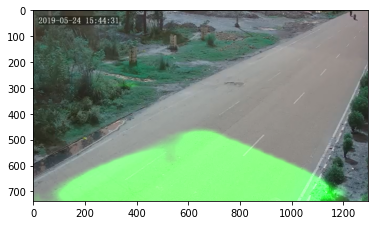

In [71]:
img_data=[]
avg_fit=[]
# Load Keras model
model = load_model('full_CNN_model.h5')
readimg=cv2.imread('sideview.png')
plt.imshow(readimg)#predict = model.predict('im.jpg')

resize_image = imresize(rreadimg,(80,160,3))
plt.imshow(resize_image)
small_img = np.array(resize_image)
small_img = small_img[None,:,:,:]
prediction = model.predict(small_img)[0]*255

img_data.append(prediction)


# Calculate average detection
avg_fit = np.mean(np.array([i for i in img_data]), axis = 0)

# Generate fake R & B color dimensions, stack with G
blanks = np.zeros_like(avg_fit).astype(np.uint8)
lane_drawn = np.dstack((blanks, avg_fit, blanks))

# Re-size to match the original image
lane_image = imresize(lane_drawn, (737, 1295, 3))
result = cv2.addWeighted(readimg,1, lane_image,1, 0)
plt.imshow(result)
# Create lanes object


In [86]:
# Load Keras model
model = load_model('full_CNN_model.h5')
# Create lanes object
lanes = Lanes()

#Where to save the output video
vid_output = 'proj_reg_vid.mp4'
# Location of the input video
clip1 = VideoFileClip(filepath_video_input)
# Create the clip
vid_clip = clip1.fl_image(road_lines)
vid_clip.write_videofile(vid_output, audio=False)

[MoviePy] >>>> Building video proj_reg_vid.mp4
[MoviePy] Writing video proj_reg_vid.mp4


100%|█████████▉| 3336/3337 [11:20<00:00,  4.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: proj_reg_vid.mp4 

